In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

from load_helpers import load

In [2]:
dataset = "two-gaussians_sensitive-attr"
split_ids = [0]
algo_names = ["UGP_in_True", "UGP_in_False"]
two_gaussians, UGP = load(dataset, algo_names, split_ids)

Text(0.5,0,'predicted score')

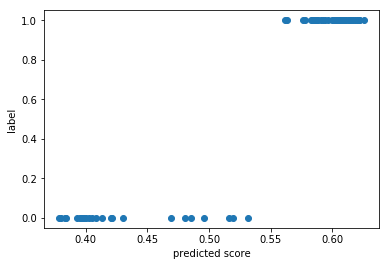

In [4]:
fig, plot = plt.subplots()
plot.plot(UGP['UGP_in_True'][0]['pred_mean'], two_gaussians[0]['ytest'], 'o')
plot.set_ylabel('label')
plot.set_xlabel('predicted score')

In [14]:
scores = UGP['UGP_in_True'][0]['pred_mean']
labels = two_gaussians[0]['ytest']
num_bins = 5
bins = np.linspace(scores.min(), scores.max(), num_bins + 1)
indices = np.digitize(scores, bins, right=True)
bins[5]

0.6252824068069458

In [19]:
accuracy = np.zeros(num_bins)
confidence = np.zeros(num_bins)
for i in range(num_bins):
    bin_index = i + 1
    # predicted_labels = (scores[indices == bin_index] > 0.5).astype(np.int32)
    accuracy[i] = np.mean(labels[indices == bin_index])
    confidence[i] = .5 * (bins[bin_index - 1] + bins[bin_index])

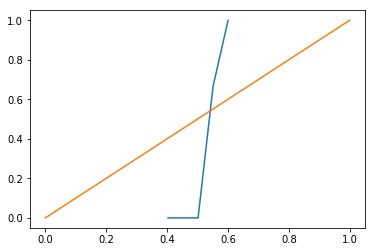

In [23]:
fig, plot = plt.subplots()
plot.plot(confidence, accuracy)
plot.plot([0, 1], [0, 1])
